<a href="https://colab.research.google.com/github/GundamYeti/MSDS462_Winter2020/blob/master/Matt_Cherry_Final_MK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-cloud-vision

     |████████████████████████████████| 440kB 2.8MB/s 


In [0]:
from google.cloud import vision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import matplotlib.pyplot as plt

import os
import io


from google.cloud import vision
from google.cloud import storage
from google.cloud.vision_v1 import enums
from google.cloud.vision_v1 import ImageAnnotatorClient
from google.cloud.vision_v1 import types
import os
import json

import os
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image as Img, ImageDraw
from IPython.display import Image

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/content/drive/My Drive/JSON_Keys/PhotoID.json' 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

#vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
#horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

img = plt.imread("/content/drive/My Drive/Die_Hard/DH1.jpg")

#dimensions
n,m,d = img.shape

#edges
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #vertical
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #horizontal
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        edges_img[row, col] = [edge_score]*3



In [0]:
#remap the values in the 0-1 range
edges_img = edges_img/edges_img.max()

In [6]:
edges_img

array([[[0.19634703, 0.2739726 , 0.3196347 ],
        [0.20091324, 0.27853881, 0.32420091],
        [0.20091324, 0.28310502, 0.32876712],
        ...,
        [0.10045662, 0.10958904, 0.05022831],
        [0.10502283, 0.11415525, 0.05479452],
        [0.11415525, 0.12328767, 0.06392694]],

       [[0.18721461, 0.26940639, 0.32420091],
        [0.19634703, 0.27853881, 0.32420091],
        [0.20547945, 0.28767123, 0.33333333],
        ...,
        [0.10502283, 0.11415525, 0.05479452],
        [0.10958904, 0.11872146, 0.05936073],
        [0.10045662, 0.10958904, 0.05022831]],

       [[0.17808219, 0.26027397, 0.31506849],
        [0.19178082, 0.2739726 , 0.32876712],
        [0.21004566, 0.29223744, 0.34703196],
        ...,
        [0.10502283, 0.11415525, 0.05479452],
        [0.10958904, 0.11872146, 0.05936073],
        [0.0913242 , 0.10045662, 0.04109589]],

       ...,

       [[0.23744292, 0.11415525, 0.06392694],
        [0.23287671, 0.10958904, 0.05936073],
        [0.2283105 , 0

In [0]:
pic = Image("/content/drive/My Drive/Die_Hard/DH1.jpg", width=500, height=500)

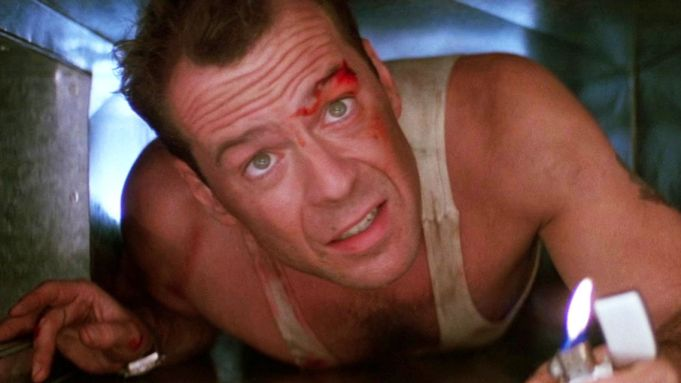

In [8]:
pic